# KNN -  K Nearest Neighbors - Classification

* KNN is one of the simplest Mchine learning algoritham.

* it simply assign a label to new data based on the distance between the OLD data And NEW data.



## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
df = pd.read_csv("gene_expression.csv")

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

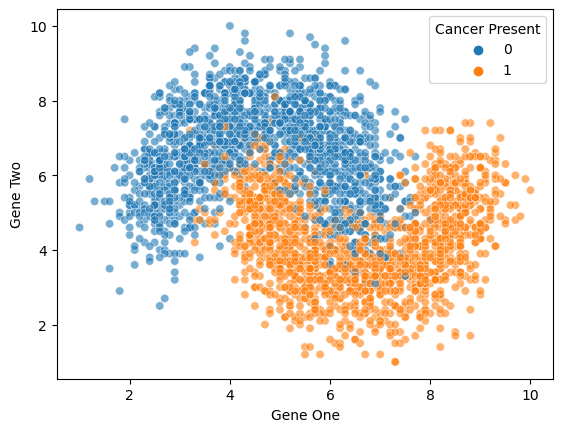

In [4]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.6)

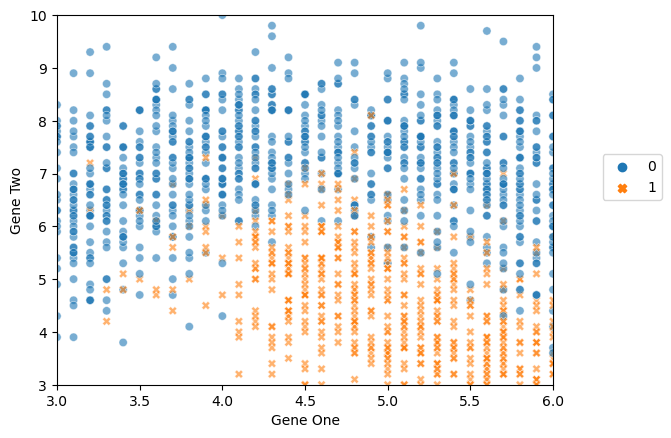

In [6]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df , style ='Cancer Present',alpha=0.6)
plt.xlim(3,6)  # The xlim and ylim functions are setting limits for the x and y axes 
plt.ylim(3,10)
plt.legend(loc=(1.1,0.5))

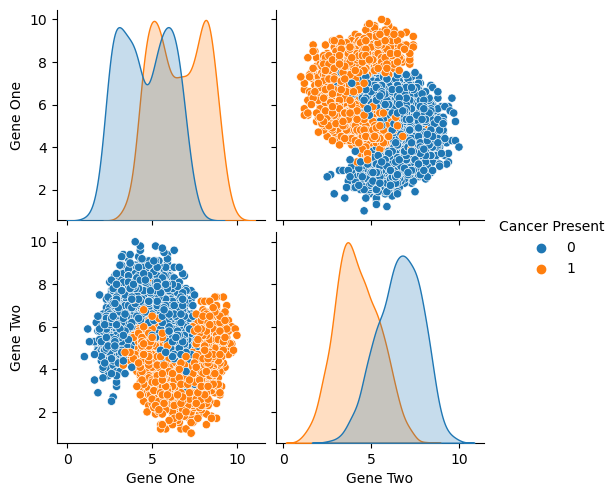

In [7]:
sns.pairplot(data=df ,hue='Cancer Present')
plt.show()

## Train|Test Split and Scaling Data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
scaler = StandardScaler()

In [13]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Understanding KNN and Choosing K Value

In [17]:
full_test = pd.concat([X_test,y_test],axis=1)

In [18]:
len(full_test)

900

<Axes: xlabel='Gene One', ylabel='Gene Two'>

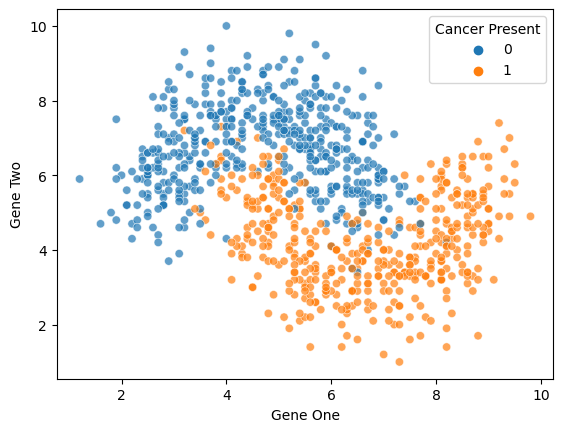

In [19]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',
                data=full_test,alpha=0.7)

## Model Evaluation

In [22]:
y_pred = knn_model.predict(scaled_X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [24]:
accuracy_score(y_test,y_pred)*100

90.11111111111111

In [25]:
confusion_matrix(y_test,y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900

